In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [2]:
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv('fifa19_data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.shape

(18207, 89)

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
df.drop('Unnamed: 0', axis = 1, inplace =True)

In [7]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',90)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

In [9]:
df.describe(include = 'all')

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207,18207.000000,18207,18207,18207,18207.000000,18207.000000,17966,18207,18207,18207,18207.000000,18159,18159.000000,18159.000000,18159.000000,18159,18159,18159,18147,18147.000000,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,16643
unique,NaN,17194,NaN,18207,164,164,NaN,NaN,651,679,217,144,NaN,2,NaN,NaN,NaN,9,10,2,27,NaN,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244
top,NaN,J. Rodríguez,NaN,https://cdn.sofifa.org/players/4/19/242643.png,England,https://cdn.sofifa.org/flags/14.png,NaN,NaN,Borussia Dortmund,https://cdn.sofifa.org/teams/2/light/11.png,€1.1M,€1K,NaN,Right,NaN,NaN,NaN,Medium/ Medium,Normal,No,ST,NaN,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€1.1M
freq,NaN,11,NaN,1,1662,1662,NaN,NaN,33,33,431,4900,NaN,13948,NaN,NaN,NaN,9810,10595,16505,2152,NaN,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557
mean,214298.338606,NaN,25.122206,NaN,NaN,NaN,66.238699,71.307299,NaN,NaN,NaN,NaN,1597.809908,NaN,1.113222,2.947299,2.361308,NaN,NaN,NaN,NaN,19.546096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,NaN
std,29965.244204,NaN,4.669943,NaN,NaN,NaN,6.908930,6.136496,NaN,NaN,NaN,NaN,272.586016,NaN,0.394031,0.660456,0.756164,NaN,NaN,NaN,NaN,15.947765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17

In [10]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [11]:
df['Club'].fillna('NoClub', inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Skill Moves'].fillna(2, inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Real Face'].fillna('No', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'10", inplace = True)
df['Weight'].fillna('190lbs', inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(), inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['Acceleration'].fillna(df['Acceleration'].mean(), inplace = True)

In [12]:
df.fillna(0, inplace = True)

In [13]:
def country(a):
    return df[df['Nationality'] == a].head()

country('India')

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8605,190939,S. Chhetri,33,https://cdn.sofifa.org/players/4/19/190939.png,India,https://cdn.sofifa.org/flags/159.png,67,67,NoClub,https://cdn.sofifa.org/flags/159.png,€0,€0,1704,Right,1.0,4.0,3.0,High/ Medium,Normal,No,LS,11.0,"Jul 1, 2018",None,2019,5'7,154lbs,66+2,66+2,66+2,63+2,64+2,64+2,64+2,63+2,62+2,62+2,62+2,61+2,54+2,54+2,54+2,61+2,50+2,44+2,44+2,44+2,50+2,49+2,43+2,43+2,43+2,49+2,49.0,71.0,67.0,56.0,68.0,63.0,67.0,68.0,39.0,64.0,76.0,73.0,72.0,62.0,76.0,66.0,60.0,68.0,59.0,67.0,49.0,25.0,65.0,56.0,73.0,67.0,30.0,24.0,44.0,10.0,7.0,11.0,9.0,10.0,0
10011,223763,S. Jhingan,24,https://cdn.sofifa.org/players/4/19/223763.png,India,https://cdn.sofifa.org/flags/159.png,65,71,NoClub,https://cdn.sofifa.org/flags/159.png,€0,€0,1472,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,RCB,5.0,"Jul 1, 2018",None,2019,6'2,163lbs,46+2,46+2,46+2,42+2,43+2,43+2,43+2,42+2,42+2,42+2,42+2,44+2,45+2,45+2,45+2,44+2,55+2,56+2,56+2,56+2,55+2,58+2,64+2,64+2,64+2,58+2,29.0,26.0,71.0,52.0,25.0,31.0,30.0,30.0,43.0,46.0,69.0,78.0,64.0,58.0,54.0,52.0,80.0,63.0,79.0,33.0,61.0,63.0,27.0,35.0,34.0,64.0,64.0,61.0,60.0,13.0,11.0,7.0,11.0,12.0,0
12598,217225,J. Lalpekhlua,27,https://cdn.sofifa.org/players/4/19/217225.png,India,https://cdn.sofifa.org/flags/159.png,63,64,NoClub,https://cdn.sofifa.org/flags/159.png,€0,€0,1630,Right,1.0,3.0,2.0,Medium/ Medium,Stocky,No,RS,12.0,"Jul 1, 2018",None,2019,5'9,165lbs,62+2,62+2,62+2,62+2,60+2,60+2,60+2,62+2,59+2,59+2,59+2,60+2,53+2,53+2,53+2,60+2,50+2,45+2,45+2,45+2,50+2,48+2,43+2,43+2,43+2,48+2,61.0,63.0,57.0,57.0,50.0,61.0,47.0,58.0,46.0,64.0,77.0,74.0,79.0,57.0,80.0,70.0,52.0,60.0,63.0,64.0,47.0,34.0,55.0,46.0,65.0,47.0,28.0,31.0,29.0,13.0,11.0,10.0,10.0,11.0,0
12811,225213,G. Singh Sandhu,26,https://cdn.sofifa.org/players/4/19/225213.png,India,https://cdn.sofifa.org/flags/159.png,63,68,NoClub,https://cdn.sofifa.org/flags/159.png,€0,€0,1063,Right,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,23.0,"Jul 1, 2018",None,2019,6'4,198lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.0,13.0,18.0,24.0,16.0,13.0,14.0,20.0,27.0,23.0,42.0,40.0,38.0,65.0,37.0,14.0,51.0,36.0,70.0,13.0,23.0,23.0,16.0,40.0,15.0,57.0,19.0,15.0,11.0,63.0,59.0,59.0,62.0,64.0,0
13508,238205,A. Edathodika,31,https://cdn.sofifa.org/players/4/19/238205.png,India,https://cdn.sofifa.org/flags/159.png,62,62,NoClub,https://cdn.sofifa.org/flags/159.png,€0,€0,1384,Left,1.0,3.0,2.0,Medium/ Medium,Normal,No,LCB,22.0,"Jul 1, 2018",None,2019,6'0,172lbs,42+2,42+2,42+2,42+2,40+2,40+2,40+2,42+2,39+2,39+2,39+2,43+2,40+2,40+2,40+2,43+2,54+2,51+2,51+2,51+2,54+2,57+2,61+2,61+2,61+2,57+2,41.0,22.0,64.0,38.0,27.0,44.0,28.0,32.0,22.0,37.0,62.0,64.0,56.0,62.0,57.0,27.0,59.0,63.0,79.0,29.0,48.0,57.0,39.0,32.0,37.0,49.0,67.0,62.0,68.0,14.0,15.0,14.0,11.0,7.0,0


#  Distribution of Preferred Foot

In [14]:
df['Preferred Foot'].value_counts()

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

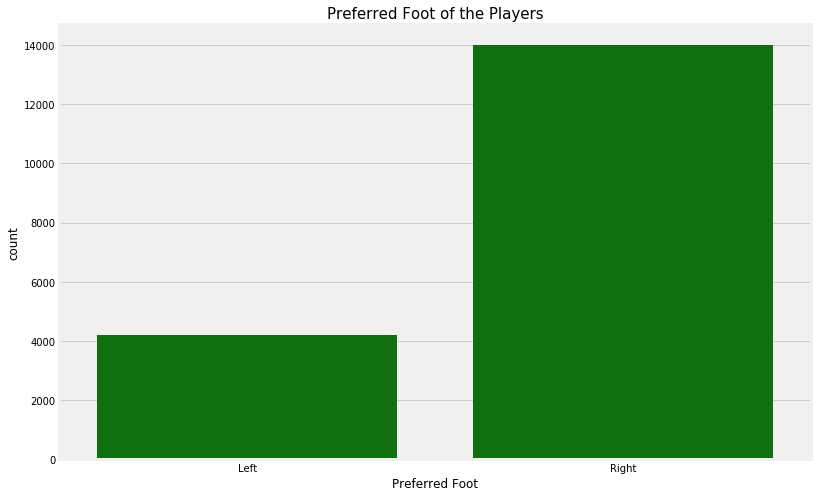

<Figure size 720x576 with 0 Axes>

In [15]:
ax = sns.countplot('Preferred Foot', data = df, color = 'green')
plt.figure(figsize=(10,8))
ax.set_title(label = 'Preferred Foot of the Players', fontsize = 15)
plt.show()

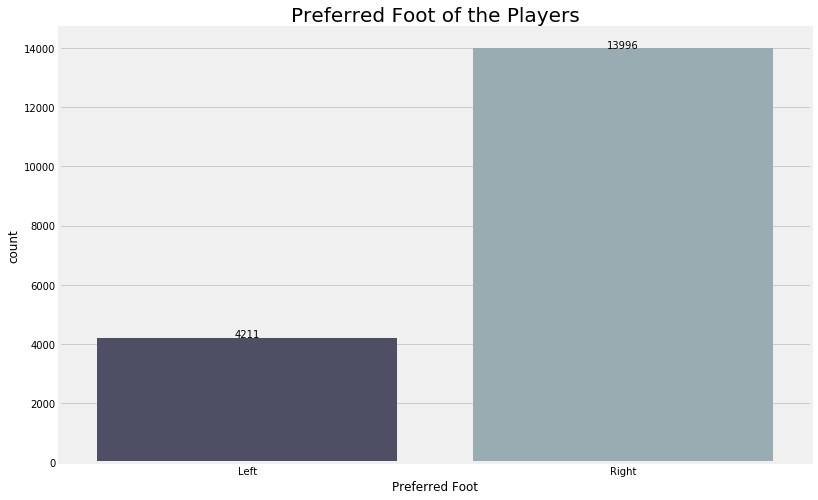

In [16]:
fig, ax = plt.subplots()
graph = sns.countplot(ax=ax,x=df['Preferred Foot'], data=df, palette = 'bone')
graph.set_title('Preferred Foot of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [17]:
df['Preferred Foot'].value_counts()/ len(df)

Right    0.768715
Left     0.231285
Name: Preferred Foot, dtype: float64

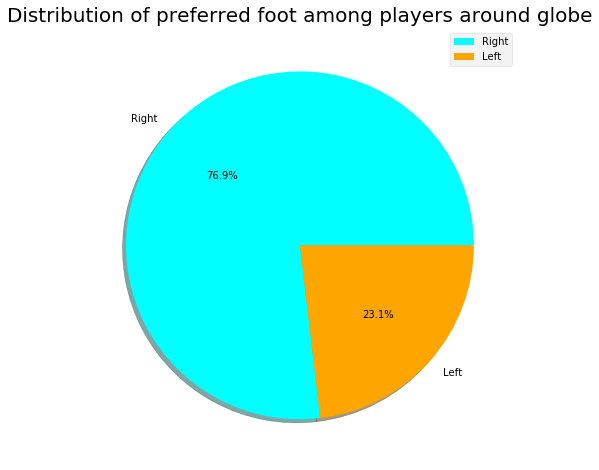

In [18]:
size =df['Preferred Foot'].value_counts()
labels = df['Preferred Foot'].value_counts().index
colors = ['cyan', 'orange']
plt.pie(size,labels = labels, colors = colors, shadow = True, autopct ='%1.1f%%')
plt.title('Distribution of preferred foot among players around globe', fontsize = 20)
plt.legend()
plt.show()

# Distribution of weak foot

In [19]:
df['Weak Foot'].value_counts()

3.0    11397
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

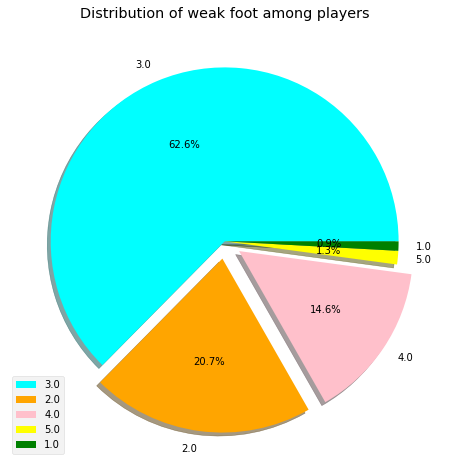

In [20]:
size = df['Weak Foot'].value_counts()
labels = df['Weak Foot'].value_counts().index
colors = ['cyan','orange','pink','yellow','green']
explode = [0,0.1,0.1,0,0]
plt.pie(size,labels = labels, colors = colors,explode = explode, shadow = True,autopct = '%1.1f%%')
plt.title('Distribution of weak foot among players')
plt.legend()
plt.show()

# Age distribution of players

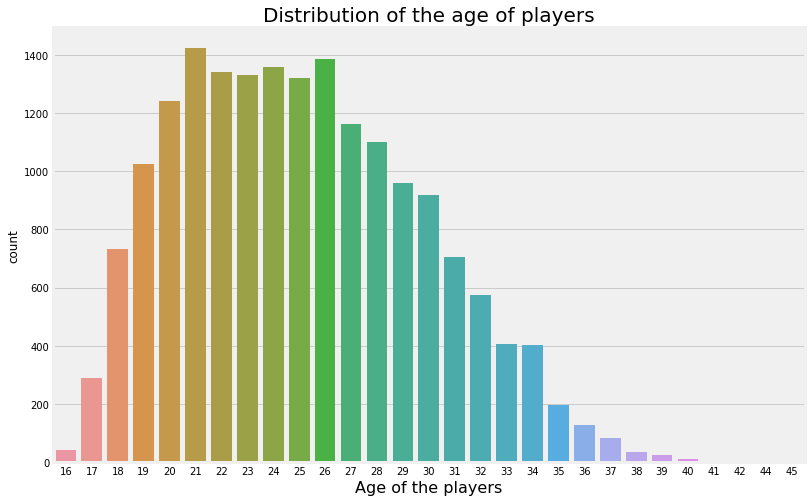

In [21]:
ax = sns.countplot(x = 'Age', data = df)
ax.set_xlabel(xlabel = 'Age of the players', fontsize =16)
ax.set_title(label = 'Distribution of the age of players', fontsize =20)
plt.show()

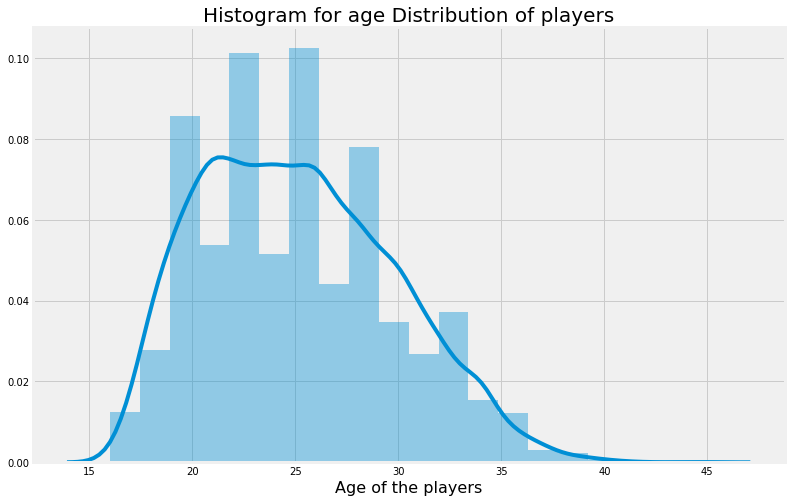

In [22]:
x = df['Age']
ax = sns.distplot(x, bins = 20, kde = True)
plt.style.use('ggplot')
ax.set_xlabel(xlabel = 'Age of the players', fontsize =16)
ax.set_title(label = 'Histogram for age Distribution of players', fontsize =20)
plt.show()

# Tracking International Reputation of players

In [23]:
df['International Reputation'].value_counts()

1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

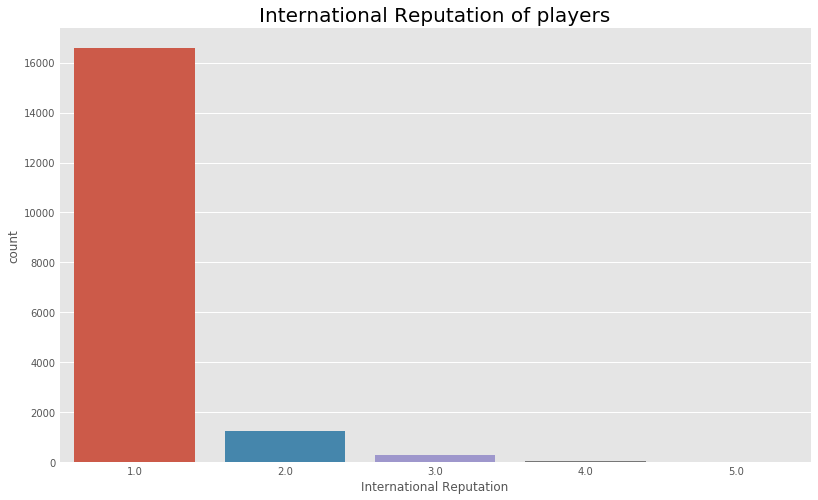

In [24]:
sns.countplot('International Reputation', data =df)
plt.title('International Reputation of players', fontsize = 20)
plt.show()

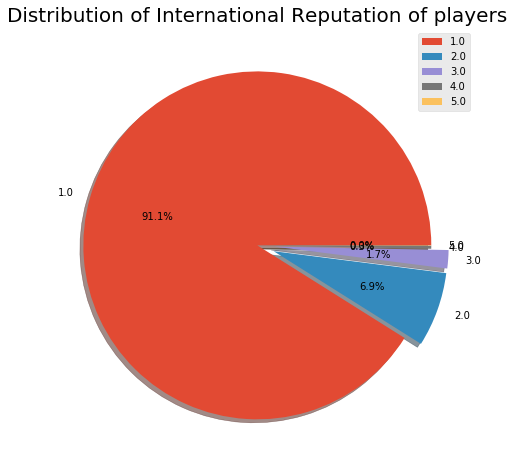

In [25]:
size = df['International Reputation'].value_counts()
labels = df['International Reputation'].value_counts().index
explode = [0,0.1,0.1,0,0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct = '%1.1f%%')
plt.title('Distribution of International Reputation of players', fontsize = 20)
plt.legend()
plt.show()

# International reputation of left and right footed players

In [26]:
df.groupby('Preferred Foot')['International Reputation'].value_counts()

Preferred Foot  International Reputation
Left            1.0                          3839
                2.0                           290
                3.0                            66
                4.0                            15
                5.0                             1
Right           1.0                         12741
                2.0                           971
                3.0                           243
                4.0                            36
                5.0                             5
Name: International Reputation, dtype: int64

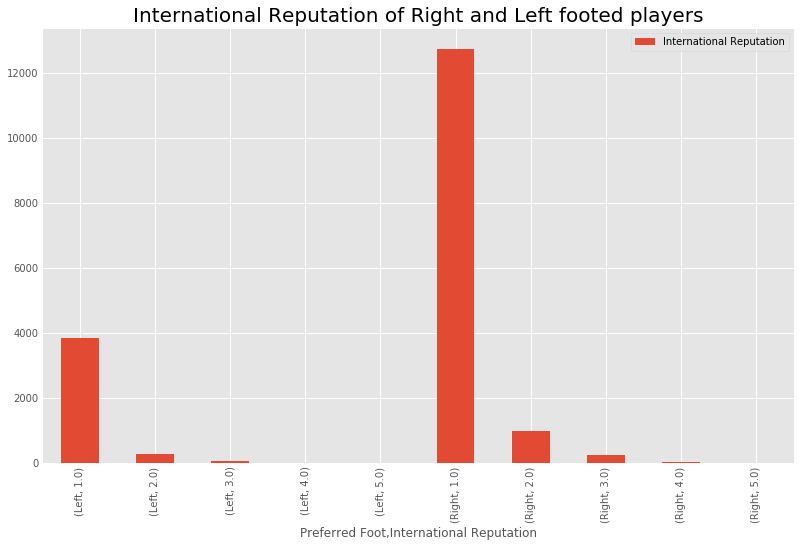

In [27]:
df.groupby('Preferred Foot')['International Reputation'].value_counts().plot(kind = 'bar')
plt.title('International Reputation of Right and Left footed players', fontsize = 20)
plt.legend()
plt.show()

# Work rate of the players

In [28]:
df['Work Rate'].value_counts()

Medium/ Medium    9858
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

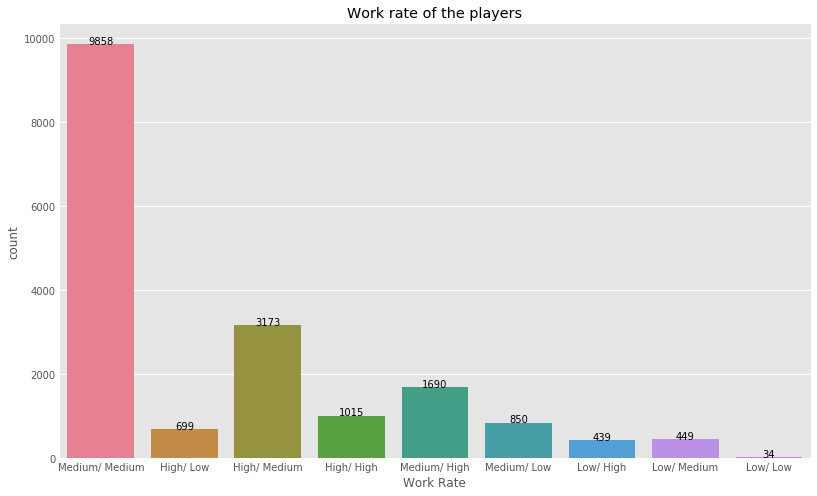

In [29]:
ax = sns.countplot(x = df['Work Rate'], palette = 'husl')
ax.set_title(label = 'Work rate of the players')
ax.set_xticklabels(ax.get_xticklabels())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height, ha = 'center')

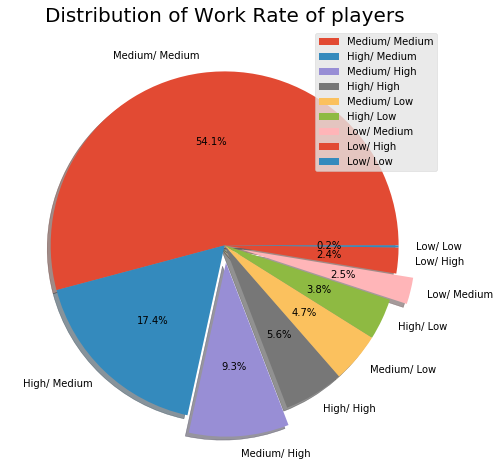

In [30]:
size = df['Work Rate'].value_counts()
labels = df['Work Rate'].value_counts().index
explode = [0,0,0.1,0,0,0,0.1,0,0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct = '%1.1f%%')
plt.title('Distribution of Work Rate of players', fontsize = 20)
plt.legend()
plt.show()

# Work Rate of players segregated by Preferred Foot

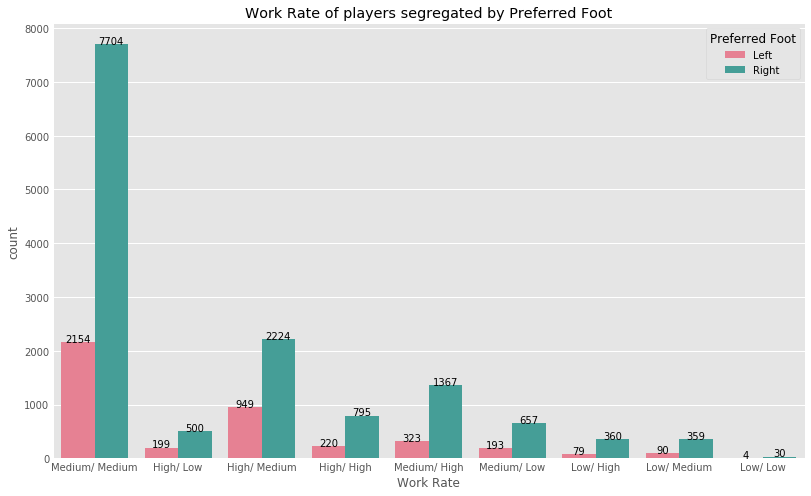

In [31]:
ax = sns.countplot(x = df['Work Rate'], hue = df['Preferred Foot'], palette = 'husl')
ax.set_title('Work Rate of players segregated by Preferred Foot')
ax.set_xticklabels(ax.get_xticklabels())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/2., height + 0.1, height, ha = 'center')

# Skill moves of the players

In [32]:
df['Skill Moves'].value_counts()

2.0    8613
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: Skill Moves, dtype: int64

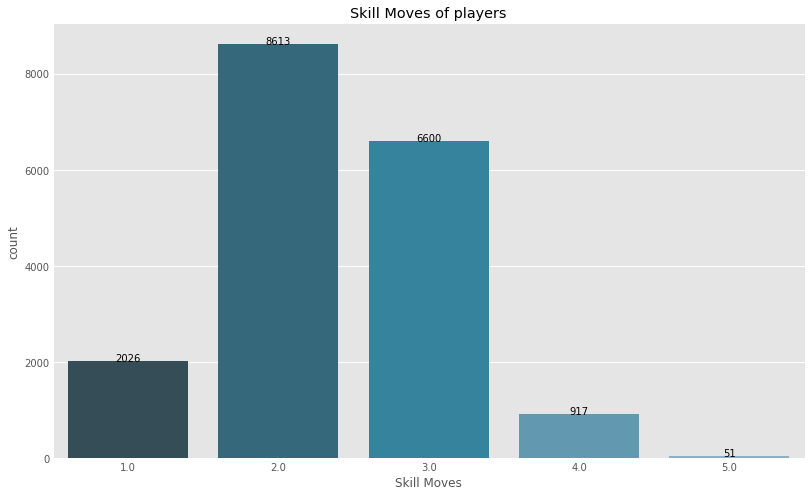

In [33]:
ax = sns.countplot(x = df['Skill Moves'], palette = 'PuBuGn_d')
ax.set_title('Skill Moves of players')
ax.set_xticklabels(ax.get_xticklabels())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/2., height + 0.1, height, ha = 'center')

# Skill Moves of players segregated by Preferred Foot

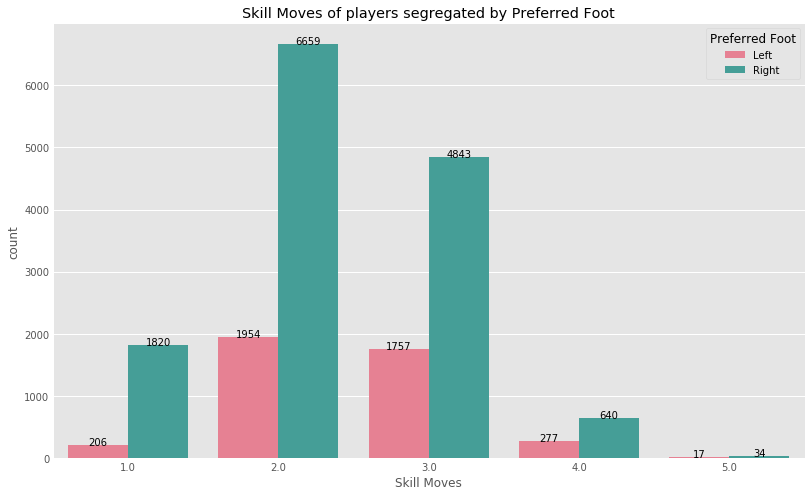

In [34]:
ax = sns.countplot(x = df['Skill Moves'], hue = df['Preferred Foot'], palette = 'husl')
ax.set_title('Skill Moves of players segregated by Preferred Foot')
ax.set_xticklabels(ax.get_xticklabels())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/2., height + 0.1, height, ha = 'center')

# Special score of players

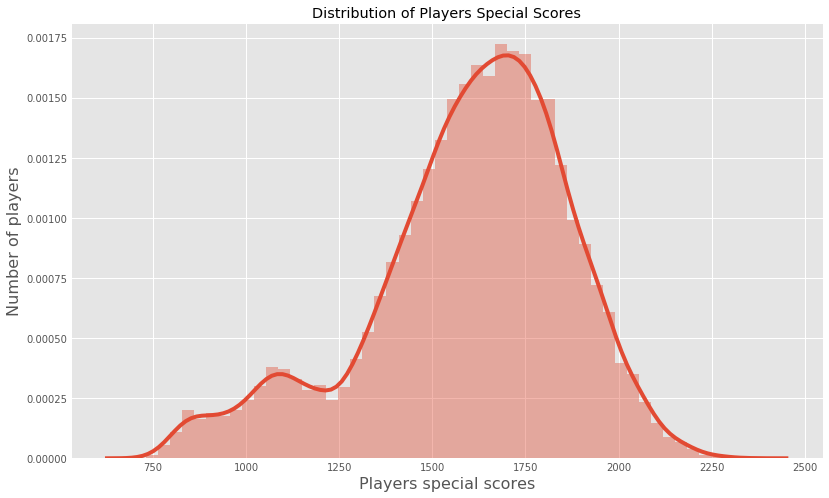

In [35]:
x = df['Special']
ax = sns.distplot(x)
ax.set_xlabel(xlabel = 'Players special scores', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Special Scores')
plt.show()

# Potential Score of Players

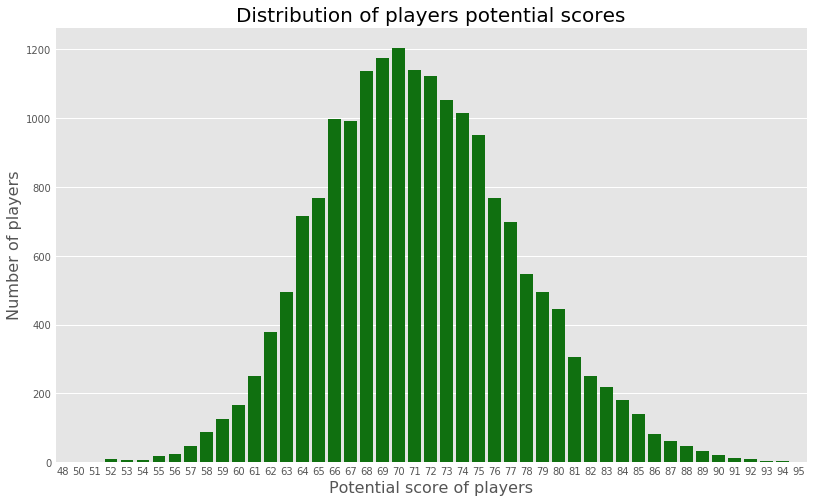

In [36]:
ax = sns.countplot(df['Potential'], color = 'green')
ax.set_xlabel (xlabel = 'Potential score of players', fontsize = 16)
ax.set_ylabel (ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Distribution of players potential scores', fontsize = 20)
plt.show()

# Overall score of the players

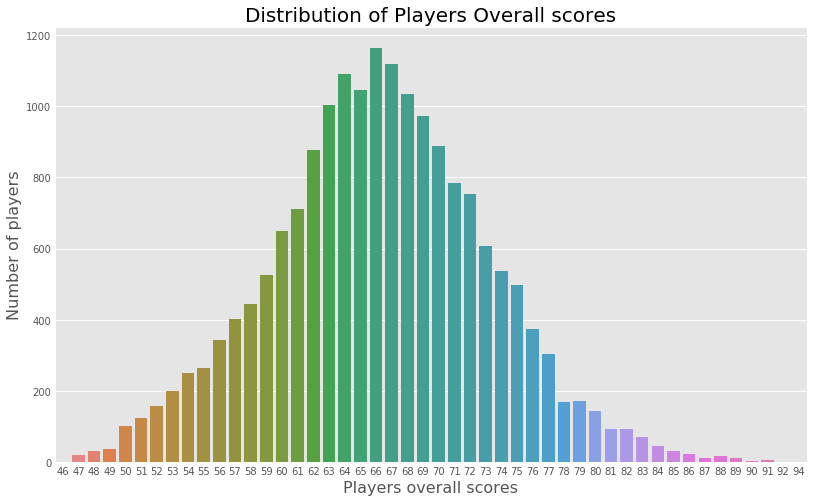

In [37]:
ax = sns.countplot(df['Overall'], palette = 'husl')
ax.set_xlabel (xlabel = 'Players overall scores', fontsize = 16)
ax.set_ylabel (ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Overall scores', fontsize = 20)
plt.show()

# Count of players with position

In [38]:
df['Position'].value_counts()

ST     2212
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

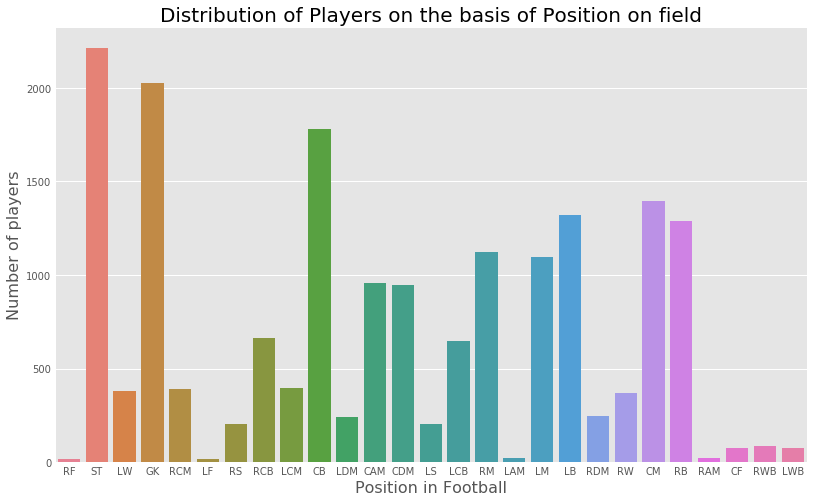

In [39]:
ax = sns.countplot(df['Position'], palette = 'husl')
ax.set_xlabel (xlabel = 'Position in Football', fontsize = 16)
ax.set_ylabel (ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Distribution of Players on the basis of Position on field', fontsize = 20)
plt.show()

# Analyse players on the basis of Nationality

In [40]:
df['Nationality'].nunique()

164

In [41]:
df['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

Top countries with Most number of Players

In [42]:
df['Nationality'].value_counts().nlargest(10)

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

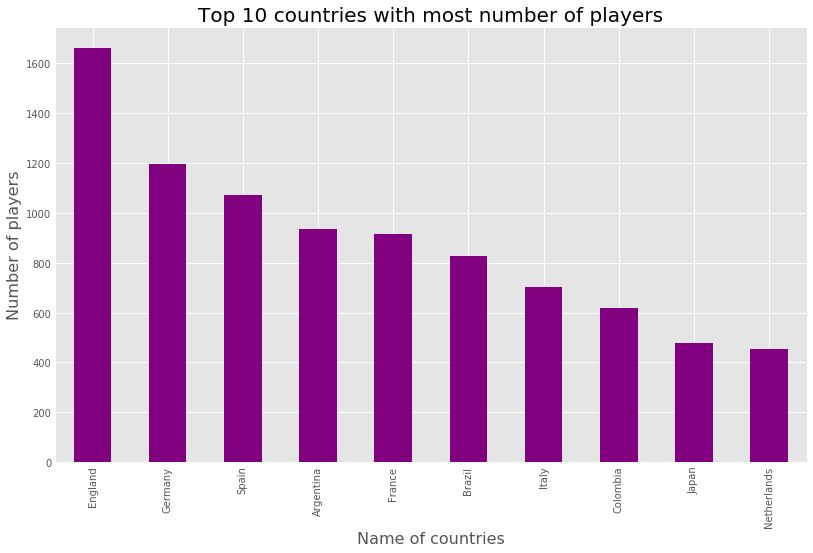

In [43]:
df['Nationality'].value_counts().nlargest(10).plot(kind = 'bar', color = 'purple')
plt.xlabel ('Name of countries', fontsize = 16)
plt.ylabel ('Number of players', fontsize = 16)
plt.title('Top 10 countries with most number of players', fontsize = 20)
plt.show()

# Age distribution from top countries

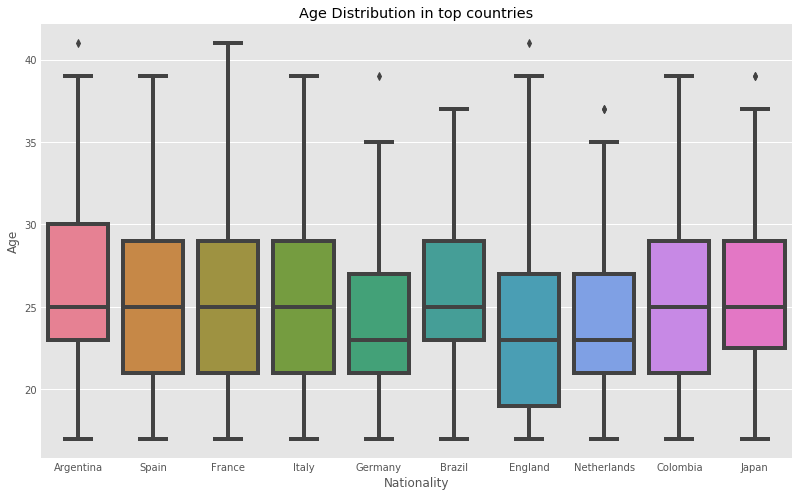

In [44]:
top_countries = df['Nationality'].value_counts().nlargest(10)
top_countries_list = top_countries.index
df_country_age = df.loc[df['Nationality'].isin(top_countries_list) & df['Age']]
sns.boxplot(x ='Nationality', y ='Age', data = df_country_age, palette = 'husl')
plt.title('Age Distribution in top countries')
plt.show()

As, we can analyse from the boxplot that England, Netherlands and Germany have youngest set of players whereas Brazil and Argentina have oldest set of players.

# Overall Rating

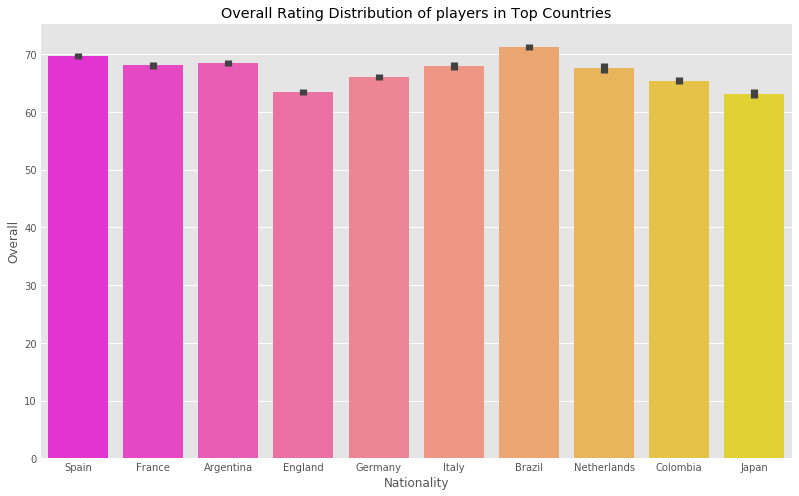

In [45]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_list) & df['Overall']]
sns.barplot(x ='Nationality', y ='Overall', data = df_country_rating, palette = 'spring')
plt.title("Overall Rating Distribution of players in Top Countries")
plt.show()

# Potential Rating

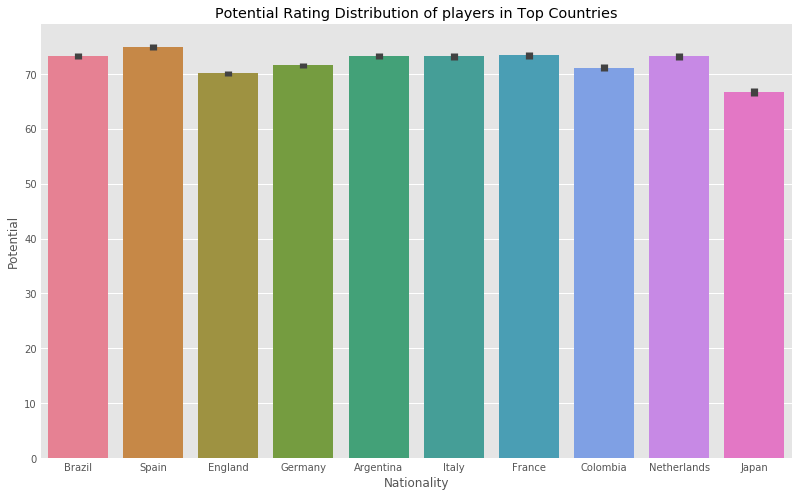

In [46]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_list) & df['Potential']]
sns.barplot(x ='Nationality', y ='Potential', data = df_country_rating, palette = 'husl')
plt.title("Potential Rating Distribution of players in Top Countries")
plt.show()

# Analyse players on basis of club

In [47]:
df['Club'].nunique()

652

In [48]:
df['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [49]:
clubs = ['FC Barcelona','Real Madrid','Juventus','Liverpool','Manchester United',
         'Chelsea','Arsenal','Paris Saint-Germain' ,'FC Bayern München','Manchester City']

# Age distribution in Top famous clubs

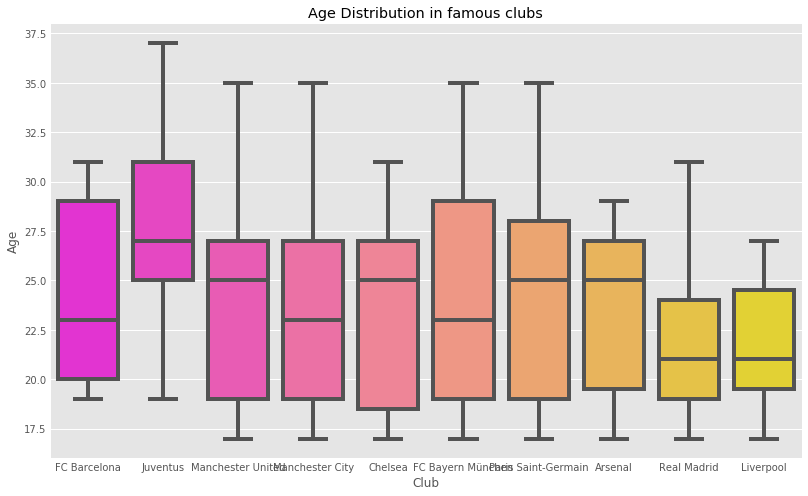

In [50]:
df_club_age = df.loc[df['Club'].isin(clubs) & df['Age']]
sns.boxplot(x = 'Club', y = 'Age' , data = df_club_age, palette='spring')
plt.title('Age Distribution in famous clubs')
plt.show()

As we can analyse from the box blot, that Jeventus has oldest set of players whereas Real Madrid and Liverpool has youngest group of players.

# Overall Rating in famous clubs

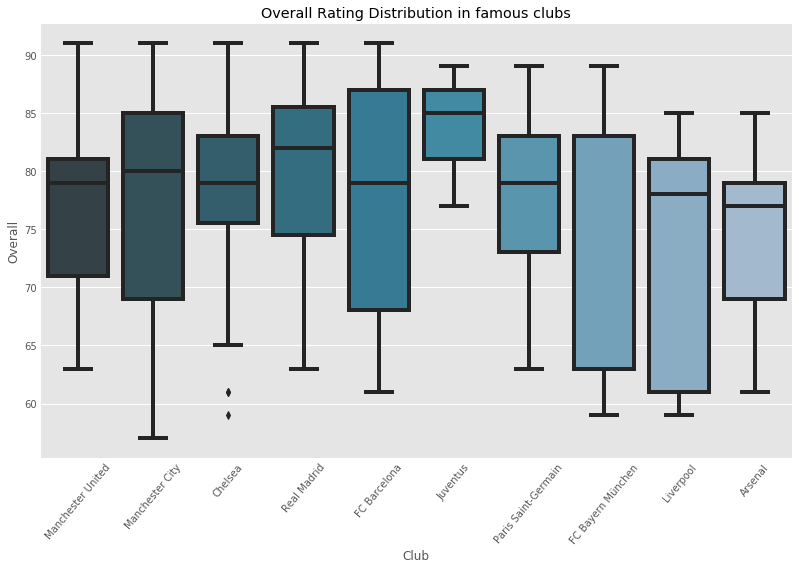

In [51]:
df_club_rating = df.loc[df['Club'].isin(clubs) & df['Overall']]
sns.boxplot(x = 'Club', y = 'Overall', data = df_club_rating, palette = 'PuBuGn_d')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

So, Jeventus has best rated players.

# Best clubs with players overall rating

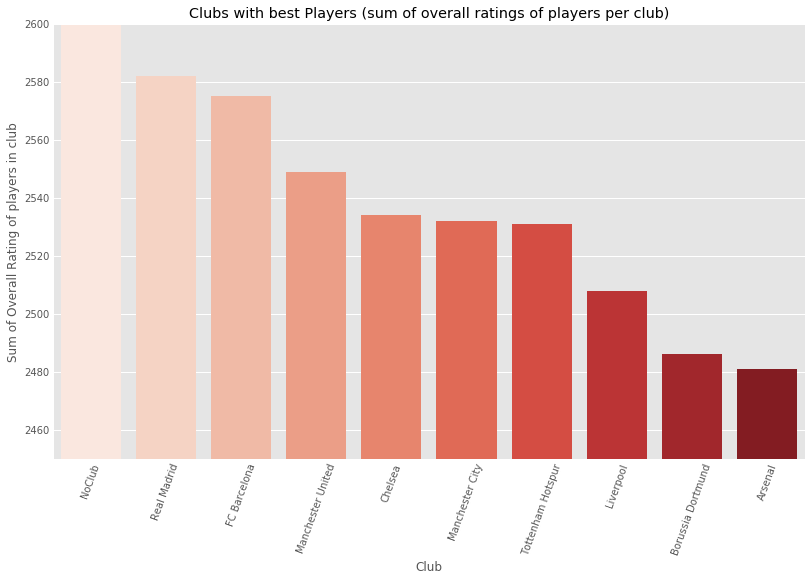

In [52]:
best_dict = {}
for club in df['Club'].unique():
    overall_rating = df['Overall'][df['Club'] == club].sum()
    best_dict[club] = overall_rating
best_club = pd.DataFrame.from_dict(best_dict, orient='index', columns = ['overall'])
best_club['club'] = best_club.index
best_club = best_club.sort_values(by = 'overall', ascending =  False)

sns.barplot(x ='club',y ='overall',data = best_club.head(10),palette='Reds')  
plt.xticks(rotation = 70)
plt.xlabel("Club")
plt.ylabel('Sum of Overall Rating of players in club')
plt.title('Clubs with best Players (sum of overall ratings of players per club)')
plt.ylim(2450 , 2600)
plt.show()

# 10 Best Players

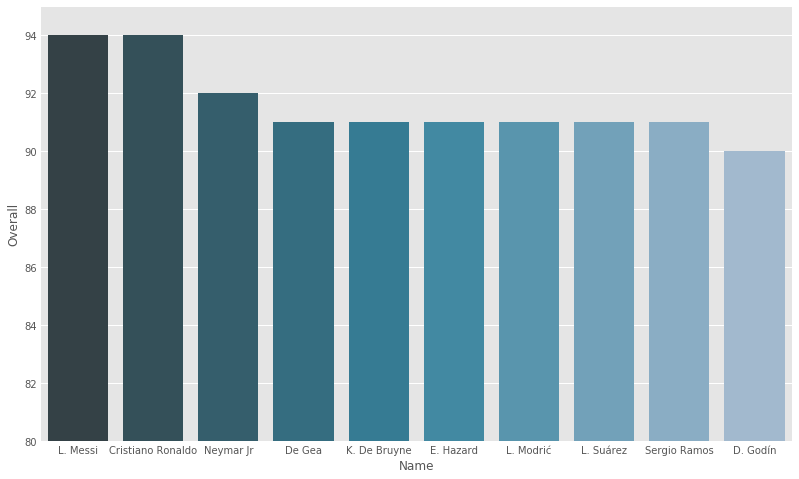

In [53]:
df_best_players = pd.DataFrame.copy(df.sort_values(by ='Overall',ascending = False ).head(10))
sns.barplot(x ='Name' , y = 'Overall' , data = df_best_players, palette='PuBuGn_d')
plt.ylim(80,95)
plt.show()

# Highest Earners

In [54]:
df['Wage'] = df['Wage'].replace({'K': '*1000', 'M': '*1000000','€': ''}, regex = True).map(pd.eval).astype(int)

In [55]:
df.sort_values(by = 'Wage' , ascending = False)[['Name','Club','Nationality','Overall','Age','Wage']].head()

,Name,Club,Nationality,Overall,Age,Wage
0,L. Messi,FC Barcelona,Argentina,94,31,565000
7,L. Suárez,FC Barcelona,Uruguay,91,31,455000
6,L. Modrić,Real Madrid,Croatia,91,32,420000
1,Cristiano Ronaldo,Juventus,Portugal,94,33,405000
8,Sergio Ramos,Real Madrid,Spain,91,32,380000


# Eldest Players

In [56]:
df.sort_values(by = 'Age', ascending = False)[['Name','Club','Nationality','Overall','Age']].head()

,Name,Club,Nationality,Overall,Age
4741,O. Pérez,Pachuca,Mexico,71,45
18183,K. Pilkington,Cambridge United,England,48,44
17726,T. Warner,Accrington Stanley,Trinidad & Tobago,53,44
10545,S. Narazaki,Nagoya Grampus,Japan,65,42
7225,C. Muñoz,CD Universidad de Concepción,Argentina,68,41


# Best Free kick Takers

In [57]:
df.sort_values(by = 'FKAccuracy', ascending = False)[['Name','Club','Nationality','Overall','Age','FKAccuracy']].head()

,Name,Club,Nationality,Overall,Age,FKAccuracy
0,L. Messi,FC Barcelona,Argentina,94,31,94.0
293,S. Giovinco,Toronto FC,Italy,82,31,93.0
72,M. Pjanić,Juventus,Bosnia Herzegovina,86,28,92.0
1113,E. Bardhi,Levante UD,FYR Macedonia,77,22,91.0
449,H. Çalhanoğlu,Milan,Turkey,80,24,90.0


# Best Penalty Kick Taker

In [58]:
df.sort_values(by = 'Penalties', ascending = False)[['Name','Club','Nationality','Overall','Age','Penalties']].head()

,Name,Club,Nationality,Overall,Age,Penalties
206,M. Balotelli,OGC Nice,Italy,83,27,92.0
118,Fabinho,Liverpool,Brazil,84,24,91.0
16,H. Kane,Tottenham Hotspur,England,89,24,90.0
823,R. Jiménez,Wolverhampton Wanderers,Mexico,78,27,90.0
945,L. Baines,Everton,England,77,33,90.0


# Best player with Ball Control

In [59]:
df.sort_values(by = 'BallControl', ascending = False)[['Name','Club','Nationality','Overall','Age','BallControl']].head()

,Name,Club,Nationality,Overall,Age,BallControl
0,L. Messi,FC Barcelona,Argentina,94,31,96.0
2,Neymar Jr,Paris Saint-Germain,Brazil,92,26,95.0
30,Isco,Real Madrid,Spain,88,26,95.0
13,David Silva,Manchester City,Spain,90,32,94.0
5,E. Hazard,Chelsea,Belgium,91,27,94.0


# Fastest Players

In [60]:
df.sort_values(by = 'SprintSpeed', ascending = False)[['Name','Club','Nationality','Overall','Age','SprintSpeed']].head()

,Name,Club,Nationality,Overall,Age,SprintSpeed
55,L. Sané,Manchester City,Germany,86,22,96.0
25,K. Mbappé,Paris Saint-Germain,France,88,19,96.0
1968,Adama,Wolverhampton Wanderers,Spain,75,22,96.0
36,G. Bale,Real Madrid,Wales,88,28,95.0
10928,Maicon,Livorno,Brazil,65,25,95.0


# Best Dribbler

In [61]:
df.sort_values(by = 'Dribbling', ascending = False)[['Name','Club','Nationality','Overall','Age','Dribbling']].head()

,Name,Club,Nationality,Overall,Age,Dribbling
0,L. Messi,FC Barcelona,Argentina,94,31,97.0
2,Neymar Jr,Paris Saint-Germain,Brazil,92,26,96.0
5,E. Hazard,Chelsea,Belgium,91,27,95.0
30,Isco,Real Madrid,Spain,88,26,94.0
94,Y. Brahimi,FC Porto,Algeria,85,28,93.0


# Best Finisher

In [62]:
df.sort_values(by = 'Finishing', ascending = False)[['Name','Club','Nationality','Overall','Age','Finishing']].head()

,Name,Club,Nationality,Overall,Age,Finishing
0,L. Messi,FC Barcelona,Argentina,94,31,95.0
16,H. Kane,Tottenham Hotspur,England,89,24,94.0
1,Cristiano Ronaldo,Juventus,Portugal,94,33,94.0
7,L. Suárez,FC Barcelona,Uruguay,91,31,93.0
23,S. Agüero,Manchester City,Argentina,89,30,93.0
